# Checking if points lie in a shape

For the purpose of tasks like Monte Carlo integration it is often useful to check if points are inside a shape.
**coxeter** makes it easy to check this for various shapes, as we'll demonstrate here.

In [1]:
import numpy as np
import coxeter
from matplotlib import pyplot as plt, patches

We start by generating a nontrivial polygon and visualizing it.

In [4]:
vertices = np.array([
    [5, 0],
    [4, 4],
    [2, 2],
    [0, 5],
    [-1, 3],
    [-3, 4],
    [-5, 0],
    [-3, -4],
    [-1, -2],
    [2, -5],
]) / 5

In [48]:
def plot_polygon(vertices):
    """Convenience function to plot a nonconvex polygon from a set of vertices."""
    fig, ax = plt.subplots(figsize=(6, 6))
    polygon_plot = ax.add_patch(patches.Polygon(vertices[:, :2], fill=False, linewidth=7, edgecolor='k'))

    ax.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
    for spine in ax.spines.values():
        spine.set_visible(False)
    fig.tight_layout()
    ax.set_xlim([-1.1, 1.1])
    ax.set_ylim([-1.1, 1.1])
    
    return fig, ax

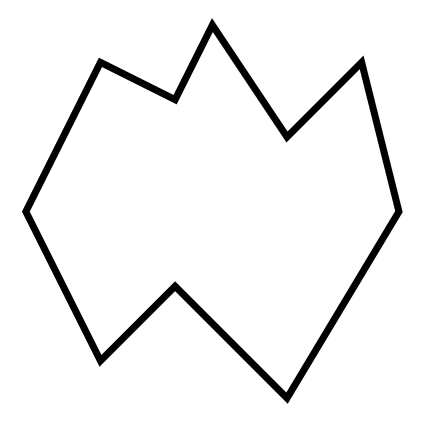

In [44]:
plot_polygon(vertices)

Now we generate a set of points somewhere in the $(-1, 1)$ range in $x$ and $y$.
Some of these points will lie inside the shape, while others will lie outside.
We'll create a coxeter `Polygon` from the vertices above, then use it to check which points lie inside the shape.

In [46]:
polygon = coxeter.shapes.Polygon(vertices)

# This seed gives a reasonable set of points.
np.random.seed(38023)
test_points = np.random.rand(40, 3) * 2 - 1
test_points[:, 2] = 0

Finally, we replot the polygon, and this time we also plot all the test points.
We will color code them, using red to indicate points outside the shape and blue for points inside.

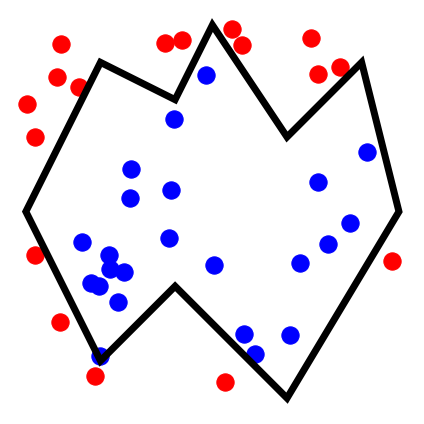

In [49]:
fig, ax = plot_polygon(vertices)
ax.scatter(test_points[is_inside][:, 0], test_points[is_inside][:, 1], c='blue', s=300)
ax.scatter(test_points[~is_inside][:, 0], test_points[~is_inside][:, 1], c='red', s=300)